### 1. Introduction




This project involves identifying gene markers of mature human heart cells for scRNAseq data, specifically Atrial and Ventricular Cardiomyocytes, using open-source data from the Heart Cell Atlas version 2.

Data Source: HCA Data Portal, https://data.humancellatlas.org

Reference: Regev A., et al. 2017. The Human Cell Atlas. Elife. Dec 5;6. pii: e27041. doi: 10.7554/eLife.27041.

The data "Global lognormalised" includes 25 adult donors, 14 female and 11 male, within the age range of 20 to 75 years old.

In [ ]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scanpy
import scanpy as sc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
heart_atlas = sc.read_h5ad('/content/drive/My Drive/Global_lognormalised.h5ad')
heart_atlas

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'donor', 'donor_type', 'region', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'cell_type', 'cell_state', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score'
    var: 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original', 'gene_id'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 'donor_type_colors', 'facility_colors', 'flushed_colors', 'gender_colors', 'kit_10x_colors', 'leiden', 'log1p', 'modality_colors', 'neighbors', 'original_or_new_colors', 'region_colors', 'region_finest_colors', 'scANVI_predictions_colors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

### Data Overview



The imported data is in a 704296x32732 sparse matrix, including gene expression of 25 donors, 14 females and 11 males. This data also have "region", "cell_type", and "modarlity" information.

In [ ]:
heart_atlas.X

<704296x32732 sparse matrix of type '<class 'numpy.float32'>'
	with 1049989447 stored elements in Compressed Sparse Row format>

In [ ]:
heart_atlas.obs.head(6)

,sangerID,donor,donor_type,region,age,gender,facility,cell_or_nuclei,modality,kit_10x,...,cell_type,cell_state,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,scrublet_score
barcode,,,,,,,,,,,,,,,,,,,,,
HCAHeart7606896_GATGAGGCACGGCTAC,HCAHeart7606896,D1,DBD,AX,50-55,Female,Sanger,Cell,scRNA,3prime-v2,...,Endothelial cell,EC5_art,2470,2470,7127.0,0.0,0.00000,469.0,6.580609,0.228571
HCAHeart7606896_CGCTTCACATTTGCCC,HCAHeart7606896,D1,DBD,AX,50-55,Female,Sanger,Cell,scRNA,3prime-v2,...,Mural cell,SMC2_art,2057,2057,6094.0,1.0,0.01641,334.0,5.480801,0.134615
HCAHeart7606896_GTTAAGCAGAGACTAT,HCAHeart7606896,D1,DBD,AX,50-55,Female,Sanger,Cell,scRNA,3prime-v2,...,Endothelial cell,EC5_art,2432,2432,6254.0,0.0,0.00000,326.0,5.212664,0.228571
HCAHeart7606896_TCGCGTTGTAAGAGGA,HCAHeart7606896,D1,DBD,AX,50-55,Female,Sanger,Cell,scRNA,3prime-v2,...,Mural cell,PC2_atria,1821,1821,5864.0,0.0,0.00000,597.0,10.180764,0.228571
HCAHeart7606896_GCTGCGAGTGTTGGGA,HCAHeart7606896,D1,DBD,AX,50-55,Female,Sanger,Cell,scRNA,3prime-v2,...,Endothelial cell,EC5_art,2332,2332,4922.0,0.0,0.00000,246.0,4.997968,0.172414
HCAHeart7606896_AAGACCTGTACTTGAC,HCAHeart7606896,D1,DBD,AX,50-55,Female,Sanger,Cell,scRNA,3prime-v2,...,Mural cell,SMC2_art,1630,1630,4713.0,0.0,0.00000,238.0,5.049862,0.078498


Region: 8 regions of the cardiac conduction system, 'AX', 'LV', 'RV', 'LA', 'SP', 'RA', 'SAN', 'AVN'
1.    AX: apex
2.    LV: left ventricular free walls
3.    RV: right ventricular free walls
4.    LA: left atria
5.    SP: interventricular septum
6.    RA: right atria
7.   SAN: sino-atrial node
8.   AVN: atrioventricular node



In [ ]:
heart_atlas.obs['region'].unique()

['AX', 'LV', 'RV', 'LA', 'SP', 'RA', 'SAN', 'AVN']
Categories (8, object): ['SAN', 'AVN', 'RA', 'LA', 'RV', 'LV', 'SP', 'AX']

Cell type: 12 categories of cell types:
1. Atrial Cardiomyocyte
2. Ventricular Cardiomyocyte
3. Fibroblast
4. Endothelial cell
5. Lymphatic Endothelial cell
6. Mural cell
7. Mesothelial cell
8. Neural cell
9. Adipocyte
10. Myeloid
11. Lymphoid
12. Mast cell

In [ ]:
heart_atlas.obs['cell_type'].unique()

cell_types = list(heart_atlas.obs['cell_type'].cat.categories)
print(cell_types)

['Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte', 'Fibroblast', 'Endothelial cell', 'Lymphatic Endothelial cell', 'Mural cell', 'Mesothelial cell', 'Neural cell', 'Adipocyte', 'Myeloid', 'Lymphoid', 'Mast cell']


Modality:
1. Multiome-RNA
2. scRNA
3. snRNA

In [ ]:
heart_atlas.obs['modality'].unique()

['scRNA', 'snRNA', 'Multiome-RNA']
Categories (3, object): ['Multiome-RNA', 'scRNA', 'snRNA']

### Preprocessing

Since our interest focuses on scRNA seq data of human cardiomyocites, we subset scRNA of 'Atrial Cardiomyocyte' and 'Ventricular Cardiomyocyte.' The imported data has already undergone log normalization.

In [ ]:
# Filter scRNA
heart_cell = heart_atlas[heart_atlas.obs.modality == 'scRNA']

In [ ]:
print(heart_cell.obs.cell_or_nuclei.unique())
print(heart_cell.obs.modality.unique())

# 7 donors are included
heart_cell.obs.donor.unique()

['Cell']
Categories (1, object): ['Cell']
['scRNA']
Categories (1, object): ['scRNA']


['D1', 'D3', 'D4', 'D5', 'D6', 'D7', 'D11']
Categories (7, object): ['D1', 'D3', 'D4', 'D5', 'D6', 'D7', 'D11']

In [ ]:
# Check the data infor after subsetting
heart_cell.obs.info()

<class 'anndata._core.views.DataFrameView'>
Index: 135698 entries, HCAHeart7606896_GATGAGGCACGGCTAC to HCAHeart8102868_TCCGTGTGTCAAGCCC
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   sangerID           135698 non-null  category
 1   donor              135698 non-null  category
 2   donor_type         135698 non-null  category
 3   region             135698 non-null  category
 4   age                135698 non-null  category
 5   gender             135698 non-null  category
 6   facility           135698 non-null  category
 7   cell_or_nuclei     135698 non-null  category
 8   modality           135698 non-null  category
 9   kit_10x            135698 non-null  category
 10  flushed            135698 non-null  category
 11  cell_type          135698 non-null  category
 12  cell_state         135698 non-null  category
 13  n_genes            135698 non-null  int64   
 14  n_genes_by_counts  135698 

In [ ]:
# Save filtered data
heart_cell.write("heart_cell_filtered.h5ad")

 # Import the saved data
 #heart_cell = sc.read_h5ad("heart_cell_filtered.h5ad")

### 2. Data Analysis (AC and VC)

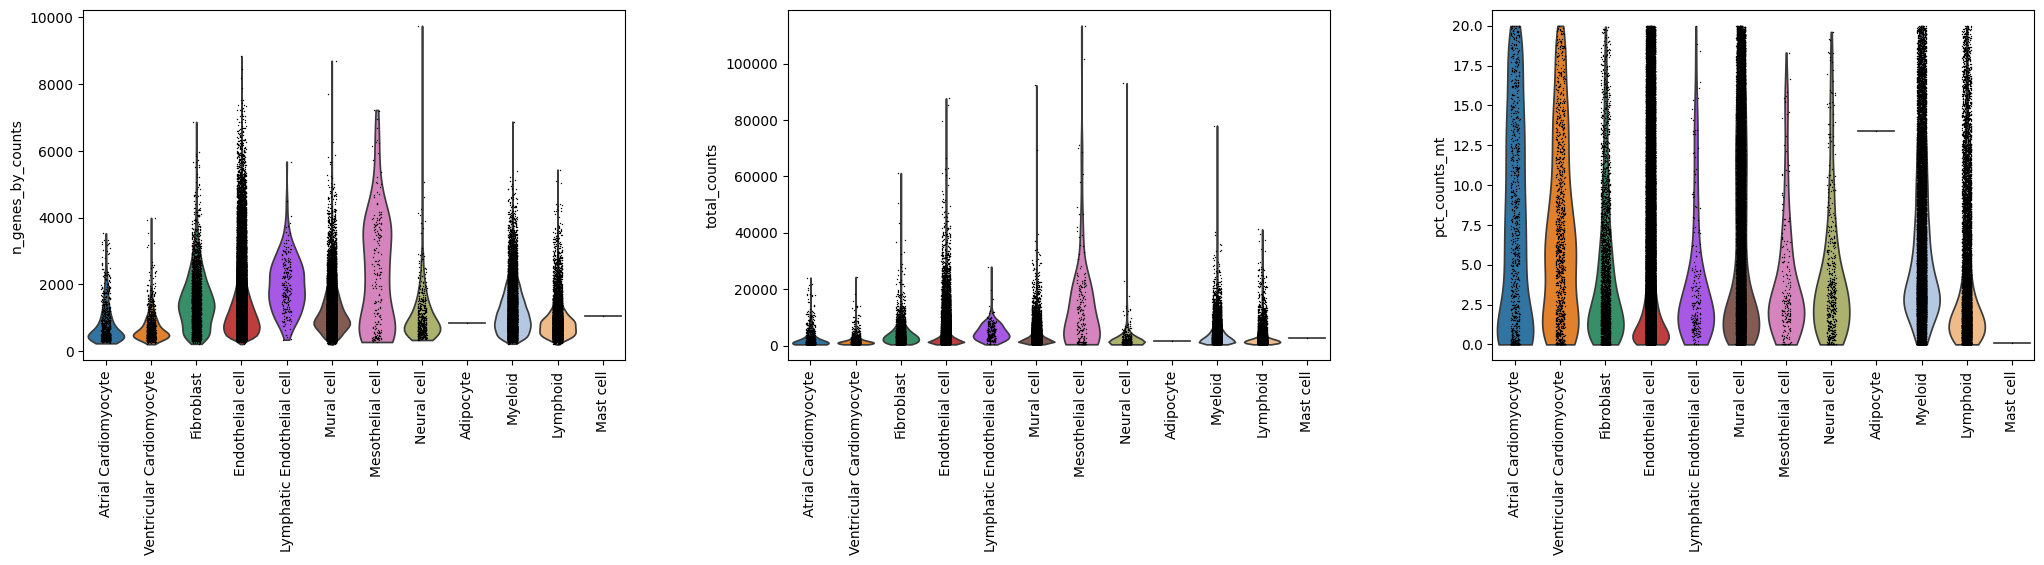

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc.pl.violin(heart_cell, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], groupby='cell_type', rotation=90)

In [ ]:
# Filter Atrial Cardiomyocyte as AC
AC = heart_cell[heart_cell.obs.cell_type == 'Atrial Cardiomyocyte']
AC.obs.head(6)

,sangerID,donor,donor_type,region,age,gender,facility,cell_or_nuclei,modality,kit_10x,...,cell_type,cell_state,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,scrublet_score
barcode,,,,,,,,,,,,,,,,,,,,,
HCAHeart7656536_TGCACCTTCGTCACGG-1,HCAHeart7656536,D3,DBD,LA,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Atrial Cardiomyocyte,aCM4,2298,2298,11042.0,1940.0,17.569281,343.0,3.106321,0.049107
HCAHeart7656536_AACTCTTCAGTCGTGC-1,HCAHeart7656536,D3,DBD,LA,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Atrial Cardiomyocyte,aCM4,2158,2158,10529.0,1991.0,18.909678,577.0,5.480103,0.059592
HCAHeart7656536_CGAGCCAGTCTCGTTC-1,HCAHeart7656536,D3,DBD,LA,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Atrial Cardiomyocyte,aCM4,2296,2296,9174.0,878.0,9.570525,590.0,6.431219,0.074380
HCAHeart7656536_CTCATTAAGTTAACGA-1,HCAHeart7656536,D3,DBD,LA,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Atrial Cardiomyocyte,aCM4,1393,1393,5002.0,18.0,0.359856,411.0,8.216713,0.045161
HCAHeart7656536_CGGCTAGCAGCTGTAT-1,HCAHeart7656536,D3,DBD,LA,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Atrial Cardiomyocyte,aCM4,1048,1048,3188.0,2.0,0.062735,284.0,8.908406,0.046444
HCAHeart7656536_GGCAATTCAACTGCGC-1,HCAHeart7656536,D3,DBD,LA,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Atrial Cardiomyocyte,aCM4,435,435,824.0,18.0,2.184466,73.0,8.859223,0.045161


In [ ]:
# Filter Ventricular Cardiomyocyte as VC
VC = heart_cell[heart_cell.obs.cell_type == 'Ventricular Cardiomyocyte']
VC.obs.head(6)

,sangerID,donor,donor_type,region,age,gender,facility,cell_or_nuclei,modality,kit_10x,...,cell_type,cell_state,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,scrublet_score
barcode,,,,,,,,,,,,,,,,,,,,,
HCAHeart7656534_GTCATTTGTCGACTAT-1,HCAHeart7656534,D3,DBD,LV,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Ventricular Cardiomyocyte,unclassified,785,785,1489.0,8.0,0.537273,142.0,9.536602,0.068966
HCAHeart7656534_TACAGTGTCCGTCAAA-1,HCAHeart7656534,D3,DBD,LV,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Ventricular Cardiomyocyte,unclassified,322,322,503.0,46.0,9.145129,50.0,9.940357,0.224880
HCAHeart7656538_CTGATAGCACAAGACG-1,HCAHeart7656538,D3,DBD,AX,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Ventricular Cardiomyocyte,vCM4,1803,1803,8538.0,0.0,0.000000,789.0,9.241040,0.073323
HCAHeart7656538_AGGCCACAGGAGTTTA-1,HCAHeart7656538,D3,DBD,AX,55-60,Male,Sanger,Cell,scRNA,3prime-v2,...,Ventricular Cardiomyocyte,vCM4,467,467,535.0,0.0,0.000000,10.0,1.869159,0.194030
HCAHeart7728605_ACCCACTCAGCAGTTT-1,HCAHeart7728605,D4,DCD,RV,70-75,Female,Sanger,Cell,scRNA,3prime-v2,...,Ventricular Cardiomyocyte,vCM4,2684,2684,6637.0,174.0,2.621666,30.0,0.452011,0.197903
HCAHeart7728605_GTCACAAGTGTGACGA-1,HCAHeart7728605,D4,DCD,RV,70-75,Female,Sanger,Cell,scRNA,3prime-v2,...,Ventricular Cardiomyocyte,vCM4,1935,1935,4343.0,194.0,4.466959,29.0,0.667741,0.181818


Both AC and VC includes data from 6 donors, 3 males and 3 females.

### Violin Plot of AC

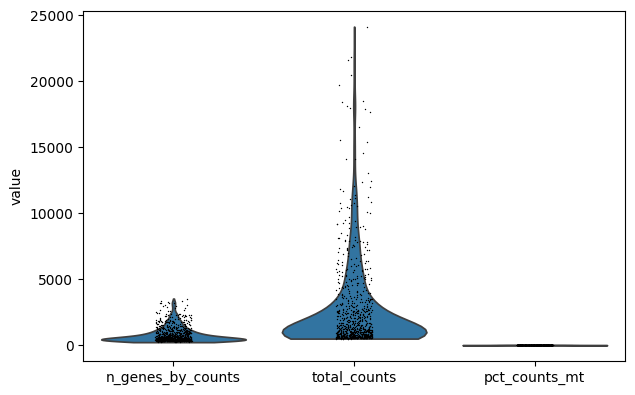

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc.pl.violin(AC, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])

### Violin Plot of AC by donor

The distributions of 'n_genes_by_counts', 'total_counts', 'pct_counts_mt'are lightly different between donors, especially D3 (D3 may have lower counts in AC and VC, or lower expression)

Donor 3, 6, 7: Male

Donoar 4, 5, 11: Female

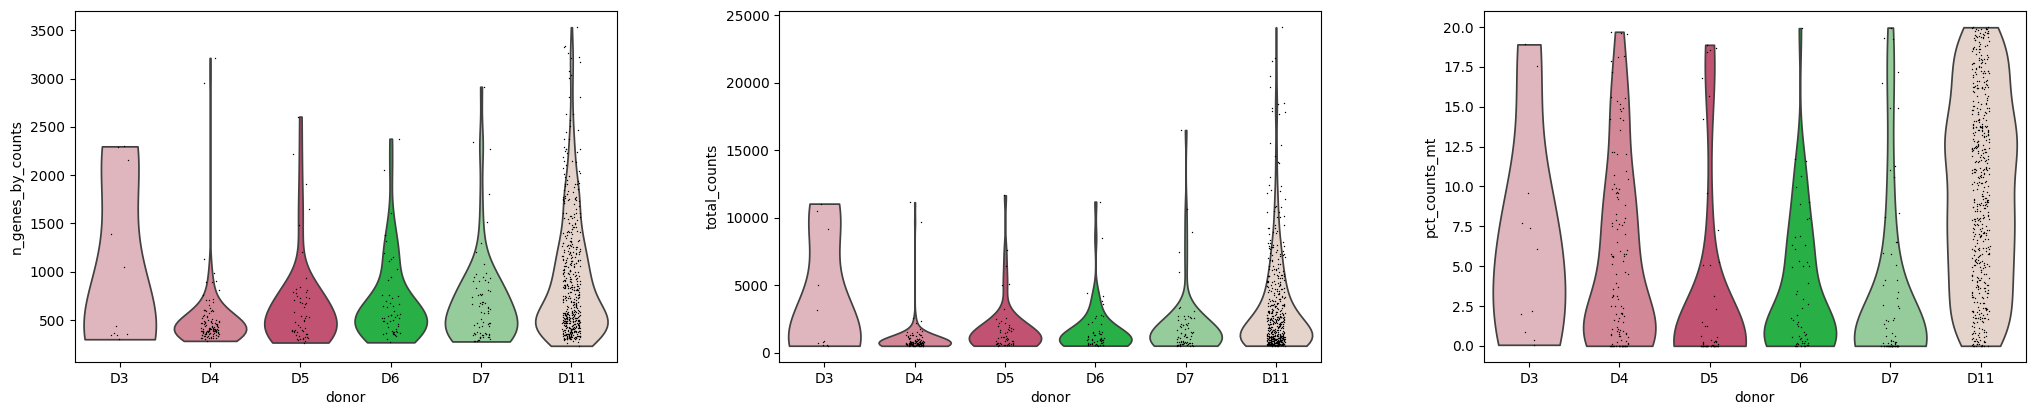

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc.pl.violin(AC, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], groupby = 'donor')

### Violin Plot of VC (Ventricular Cardiomyocyte)

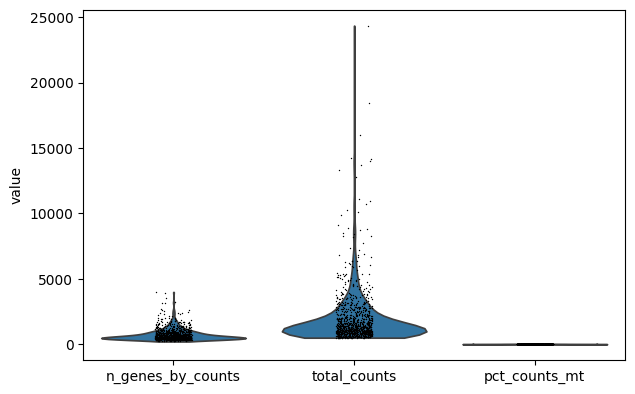

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc.pl.violin(VC, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])

### Violin Plot of VC by donor

Donor 3, 6, 7: Male

Donoar 4, 5, 11: Female

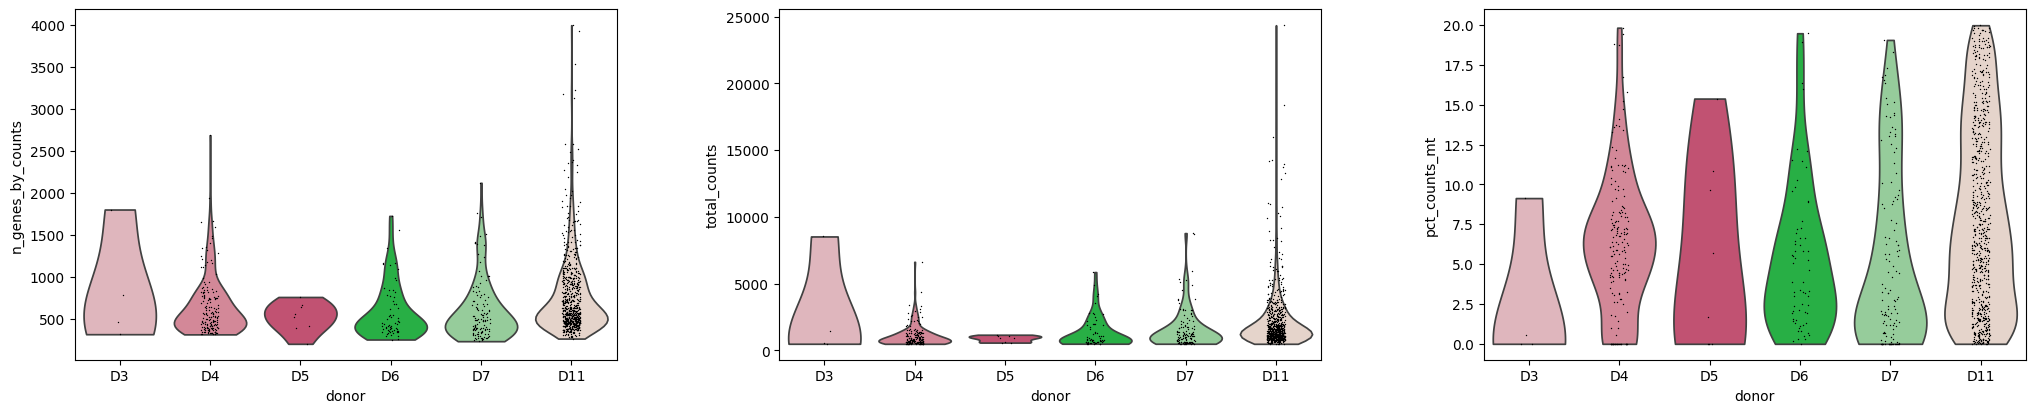

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc.pl.violin(VC, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], groupby = 'donor')

### Highest Expressed Genes in AC

In [ ]:
import warnings
import matplotlib.pyplot as plt

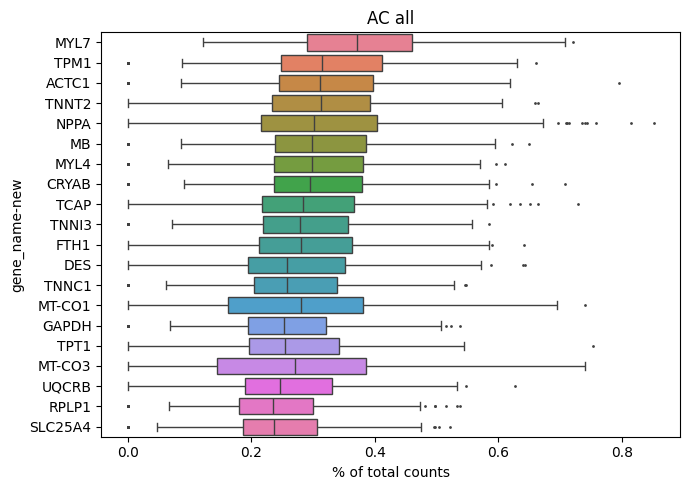

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    fig, ax = plt.subplots(figsize=(7, 5))

    sc.pl.highest_expr_genes(AC, n_top=20, ax=ax, show=False)
    ax.set_title('AC all')
    plt.tight_layout()
    plt.show()

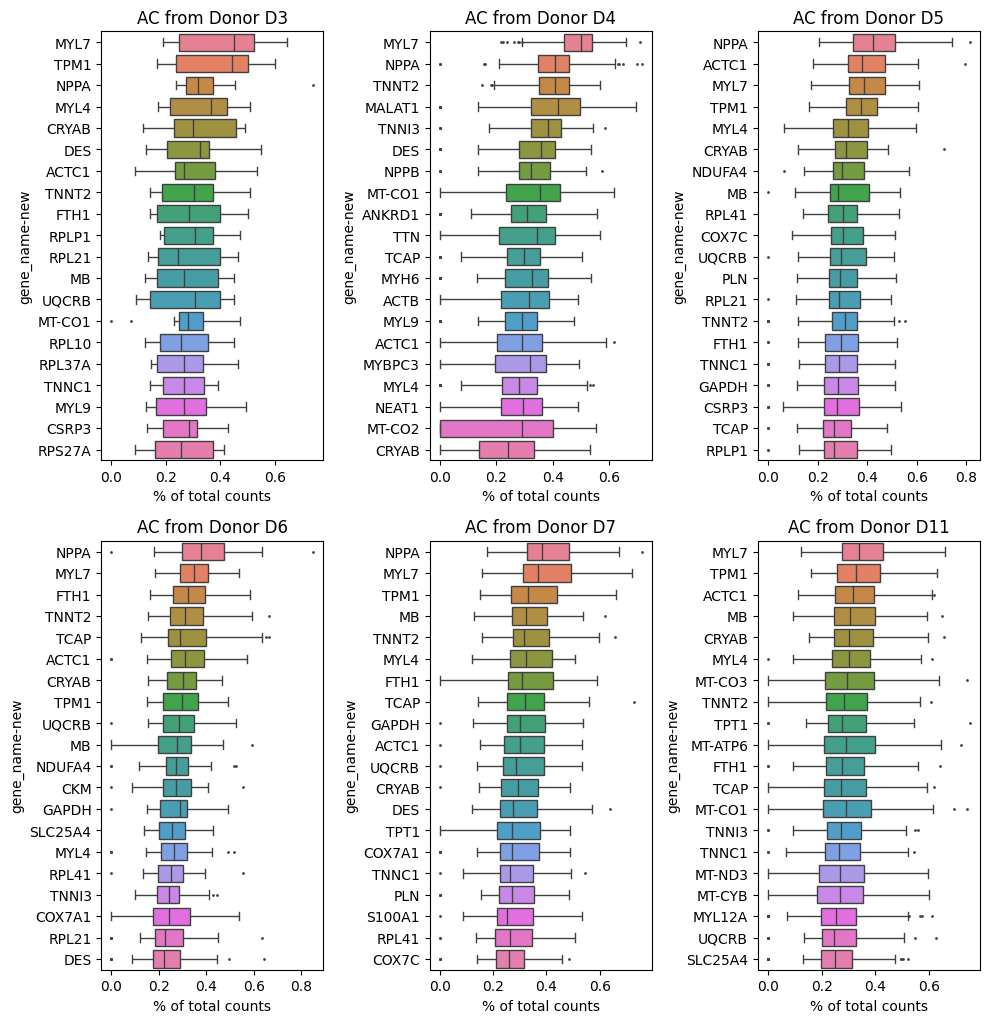

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    fig, axs = plt.subplots(3, 3, figsize=(10, 15))

    for i, donor in enumerate(['D3', 'D4', 'D5', 'D6', 'D7', 'D11']):
        row = i // 3
        col = i % 3

        sc.pl.highest_expr_genes(AC[AC.obs.donor == donor], n_top=20, ax=axs[row, col], show=False)
        axs[row, col].set_title(f'AC from Donor {donor}')

    for j in range(i + 1, 3 * 3):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

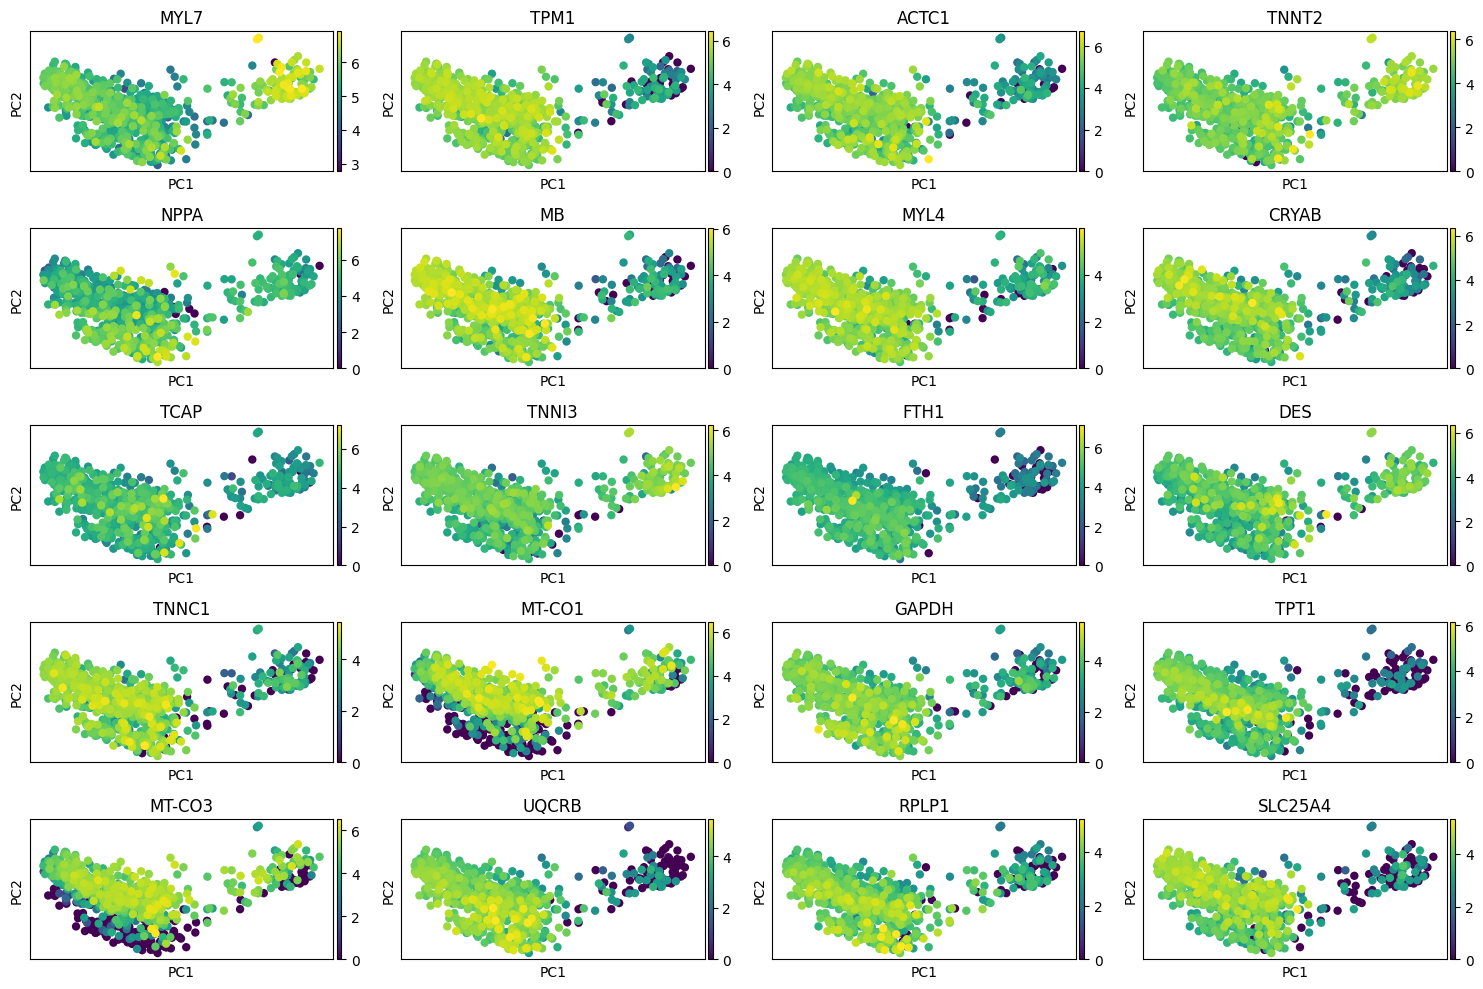

In [ ]:
highly_expressed_genes_AC = ['MYL7', 'TPM1', 'ACTC1', 'TNNT2', 'NPPA', 'MB',
                             'MYL4', 'CRYAB', 'TCAP', 'TNNI3', 'FTH1', 'DES',
                             'TNNC1', 'MT-CO1', 'GAPDH', 'TPT1', 'MT-CO3',
                             'UQCRB', 'RPLP1', 'SLC25A4' ]
sc.tl.pca(AC, svd_solver='arpack')

fig, axs = plt.subplots(5, 4, figsize=(15, 10))
axs = axs.flatten()
for i, gene in enumerate(highly_expressed_genes_AC):
    sc.pl.pca(AC, color=gene, ax=axs[i], show=False)
    axs[i].set_title(f'{gene}')
plt.tight_layout()
plt.show()

### Highest Expressed Genes in VC

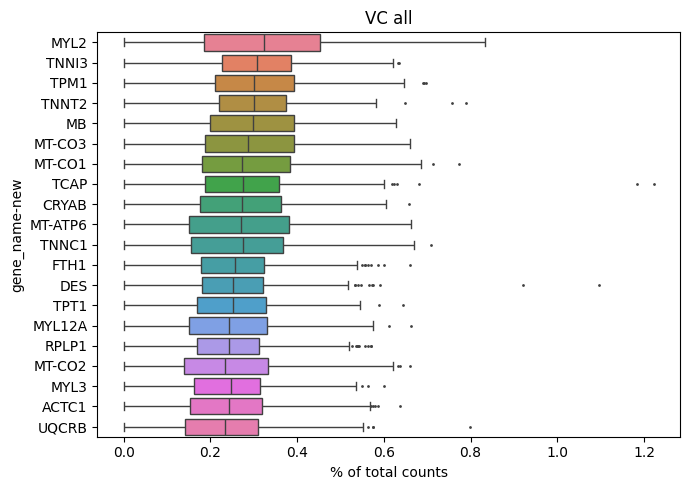

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    fig, ax = plt.subplots(figsize=(7, 5))

    sc.pl.highest_expr_genes(VC, n_top=20, ax=ax, show=False)
    ax.set_title('VC all')
    plt.tight_layout()
    plt.show()

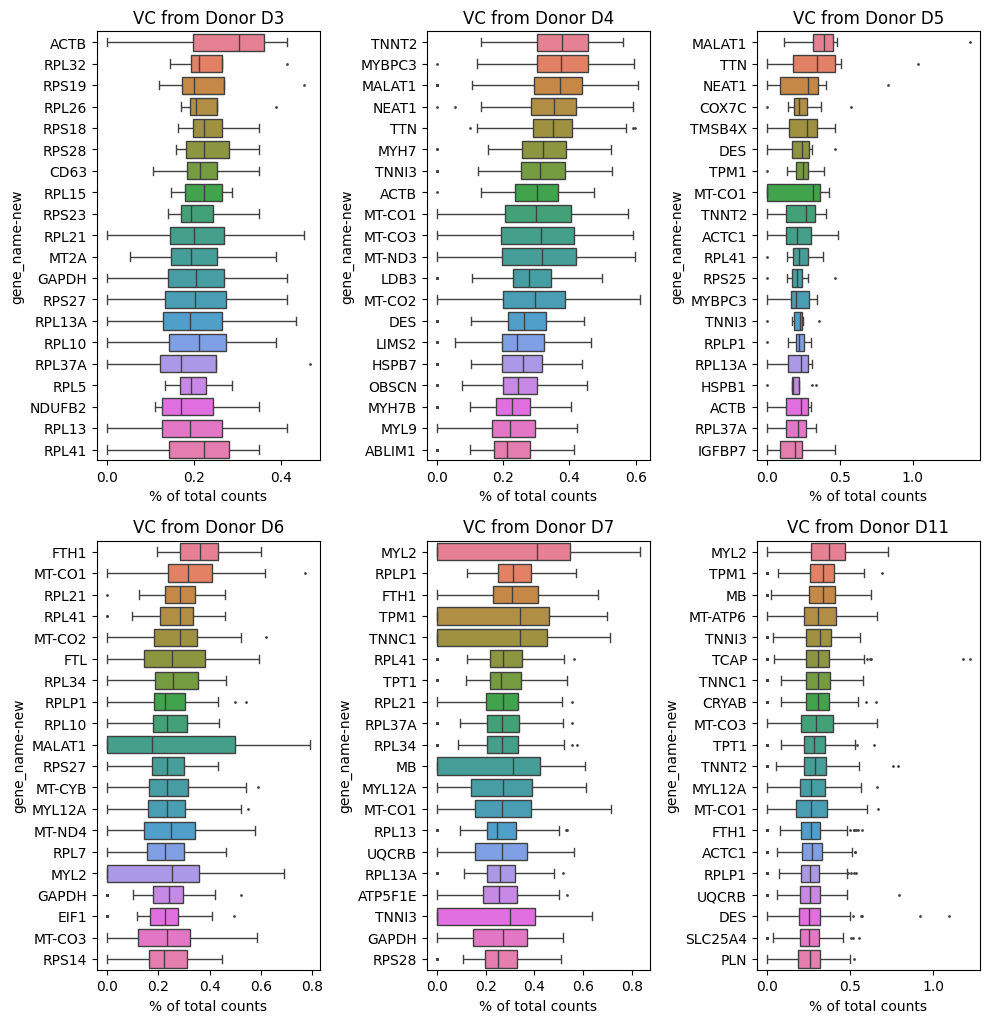

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    fig, axs = plt.subplots(3, 3, figsize=(10, 15))

    for i, donor in enumerate(['D3', 'D4', 'D5', 'D6', 'D7', 'D11']):
        row = i // 3
        col = i % 3

        sc.pl.highest_expr_genes(VC[VC.obs.donor == donor], n_top=20, ax=axs[row, col], show=False)
        axs[row, col].set_title(f'VC from Donor {donor}')

    for j in range(i + 1, 3 * 3):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

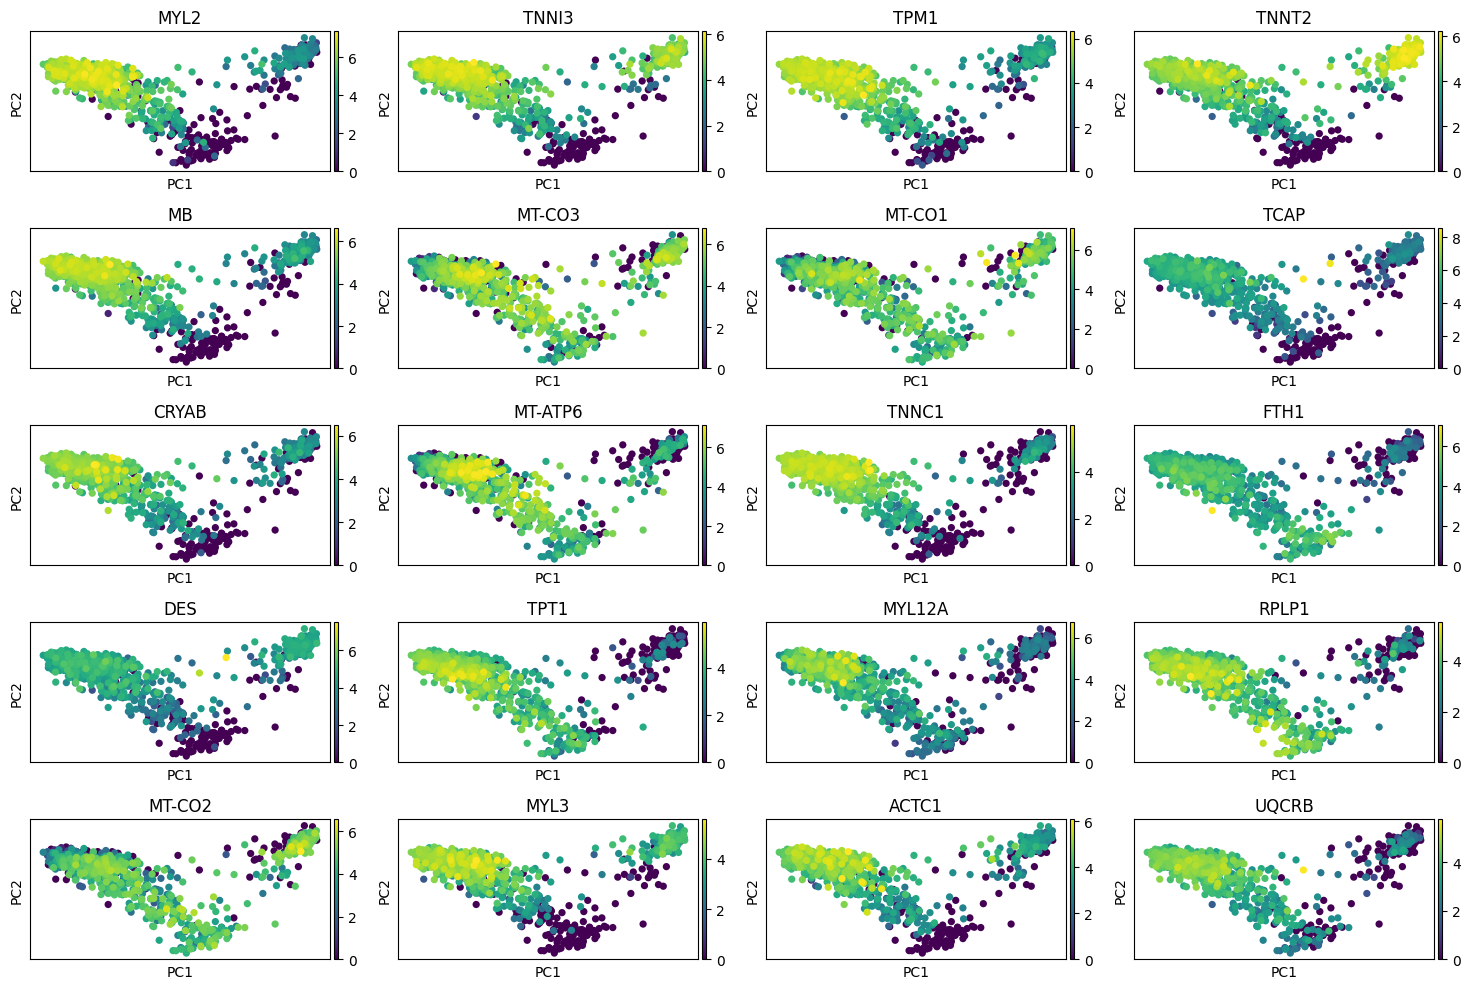

In [ ]:
highly_expressed_genes_VC = ['MYL2', 'TNNI3', 'TPM1', 'TNNT2', 'MB', 'MT-CO3',
                             'MT-CO1', 'TCAP', 'CRYAB', 'MT-ATP6', 'TNNC1',
                             'FTH1','DES', 'TPT1', 'MYL12A', 'RPLP1', 'MT-CO2',
                             'MYL3', 'ACTC1', 'UQCRB' ]
sc.tl.pca(VC, svd_solver='arpack')

fig, axs = plt.subplots(5, 4, figsize=(15, 10))
axs = axs.flatten()
for i, gene in enumerate(highly_expressed_genes_VC):
    sc.pl.pca(VC, color=gene, ax=axs[i], show=False)
    axs[i].set_title(f'{gene}')
plt.tight_layout()
plt.show()

### Highly Variable Genes List

In [ ]:
# AC
sc.pp.highly_variable_genes(AC, n_top_genes=20)
top_hv_genes_AC = AC.var_names[AC.var['highly_variable']]

print("Top highly variable genes for AC:")
print(top_hv_genes_AC)

# VC
sc.pp.highly_variable_genes(VC, n_top_genes=20)
top_hv_genes_VC = VC.var_names[VC.var['highly_variable']]

print("\nTop highly variable genes for VC:")
print(top_hv_genes_VC)

Top highly variable genes for AC:
Index(['PLA2G2A', 'ACTA1', 'TTN', 'IGFBP7', 'SPARCL1', 'CCN2', 'ACTB', 'FLNC',
       'TMSB4X', 'FLNA', 'FABP5', 'FABP4', 'ADIRF', 'MGP', 'NDUFA4L2', 'DCN',
       'IFI27', 'B2M', 'HAMP', 'APOE'],
      dtype='object', name='gene_name-new')

Top highly variable genes for VC:
Index(['NPPA', 'S100A12', 'IGKC', 'PF4', 'PPBP', 'LTB', 'TNFAIP3', 'INSIG1',
       'CCL21', 'HBB', 'CD69', 'INTS6', 'IGHG4', 'IGHA1', 'HBA2', 'HBA1',
       'TPSB2', 'TPSAB1', 'MT2A', 'CCL3'],
      dtype='object', name='gene_name-new')


### Highly Variable Genes in AC

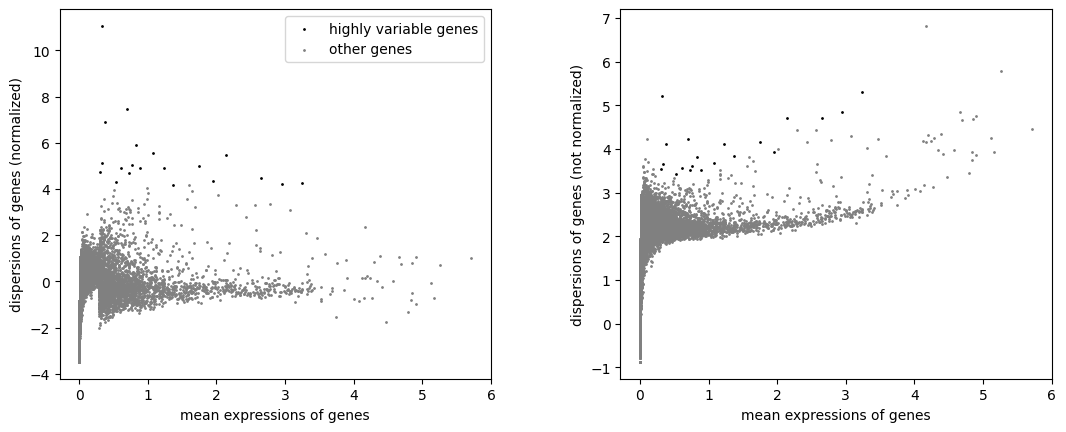

In [ ]:
sc.pl.highly_variable_genes(AC)

### Highly Variable Genes in VC

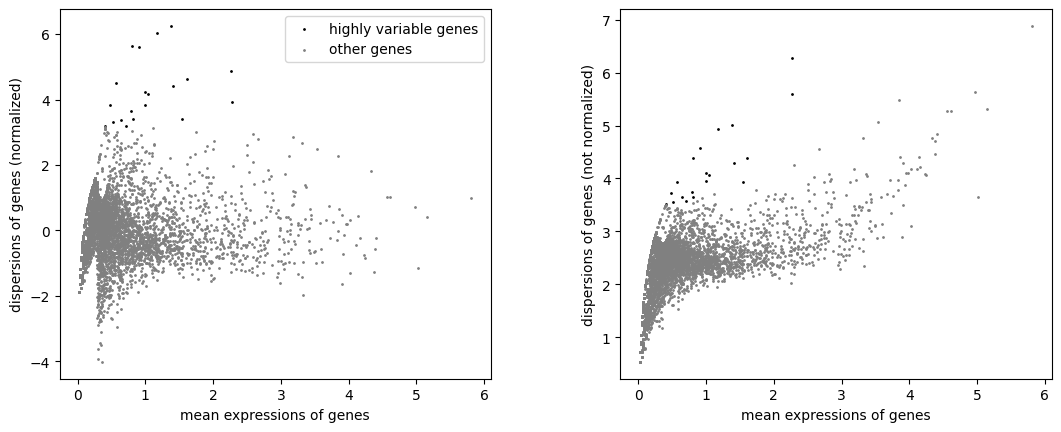

In [ ]:
sc.pl.highly_variable_genes(VC)

### PCA

In [ ]:
AC.var.head(5)

,gene_name_scRNA-0-original,gene_name_snRNA-1-original,gene_name_multiome-2-original,gene_id,highly_variable,means,dispersions,dispersions_norm
gene_name-new,,,,,,,,
NPPB,NPPB,NPPB,NPPB,ENSG00000120937,False,0.962347,0.632084,4.815972
HSPG2,HSPG2,HSPG2,HSPG2,ENSG00000142798,False,0.217816,0.972017,4.479051
OBSCN,OBSCN,OBSCN,OBSCN,ENSG00000154358,False,0.341970,1.064611,7.155135
ACTA1,ACTA1,ACTA1,ACTA1,ENSG00000143632,True,0.902143,0.816905,4.879043
TTN,TTN,TTN,TTN,ENSG00000155657,True,0.781442,0.821760,4.558444


### Variance Ratio in AC

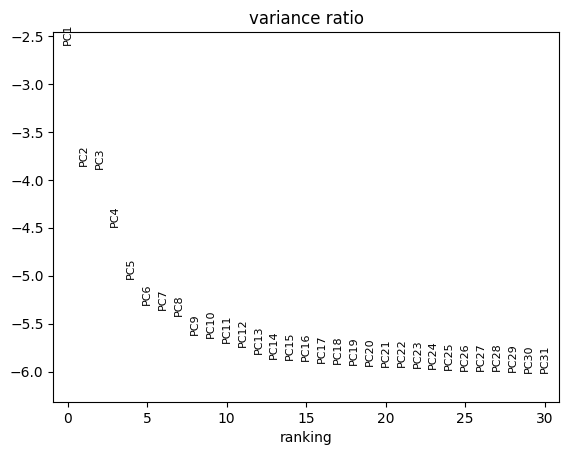

In [ ]:
sc.pl.pca_variance_ratio(AC, log=True)

### Variance Ratio in VC

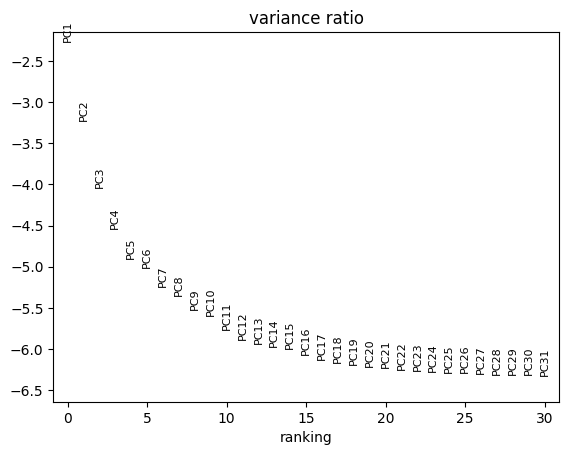

In [ ]:
sc.pl.pca_variance_ratio(VC, log=True)

### 3. Find Marker Genes

In [ ]:
cell_type_counts = heart_cell.obs['cell_type'].value_counts()
valid_cell_types = cell_type_counts[cell_type_counts > 1].index

# Filter heart_cell to include only cell types containing more than one sample
heart_cell_filtered = heart_cell[heart_cell.obs['cell_type'].isin(valid_cell_types)]

# Use wilcoxon for method
sc.tl.rank_genes_groups(heart_cell_filtered, groupby='cell_type', method='wilcoxon')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


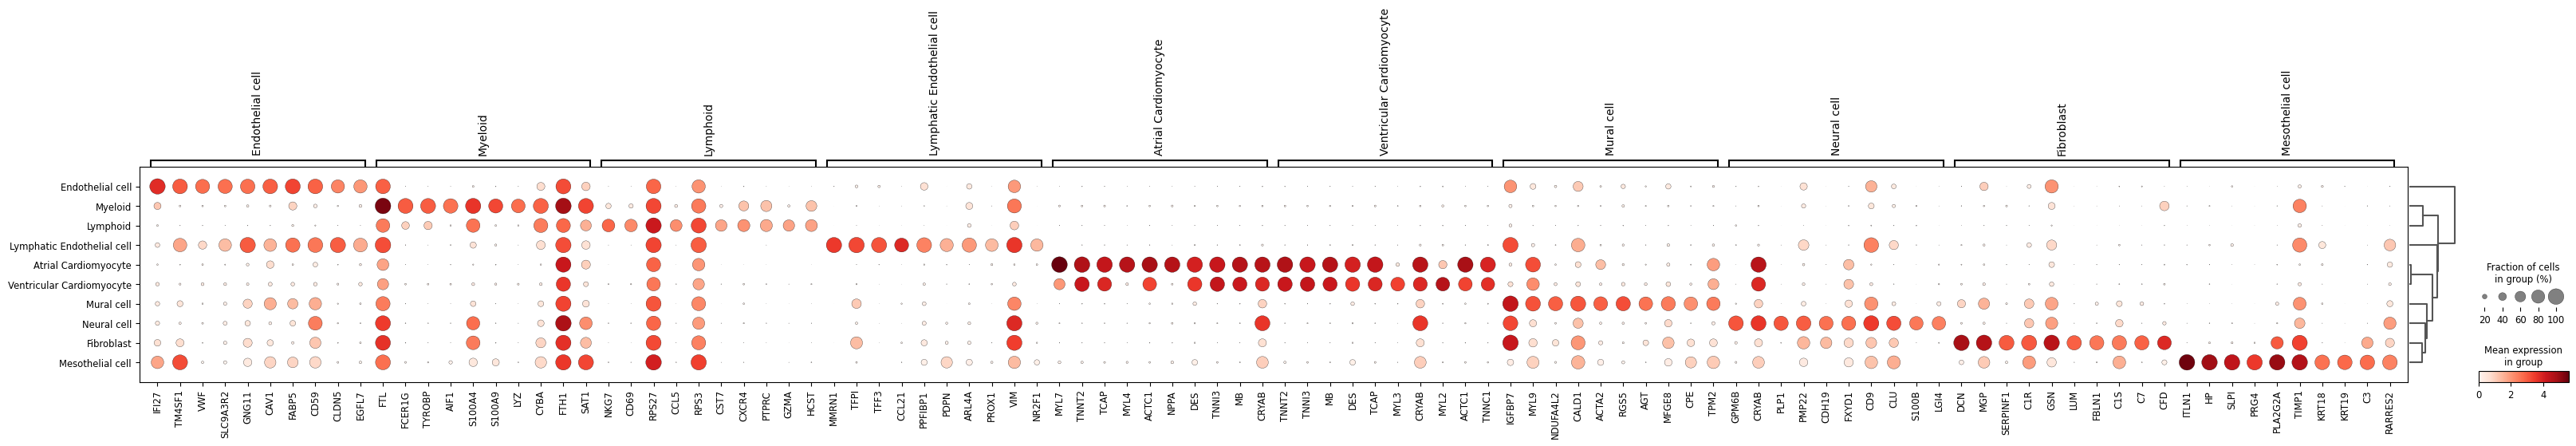

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  sc.pl.rank_genes_groups_dotplot(heart_cell_filtered)

top_genes = heart_cell_filtered.uns['rank_genes_groups']['names']

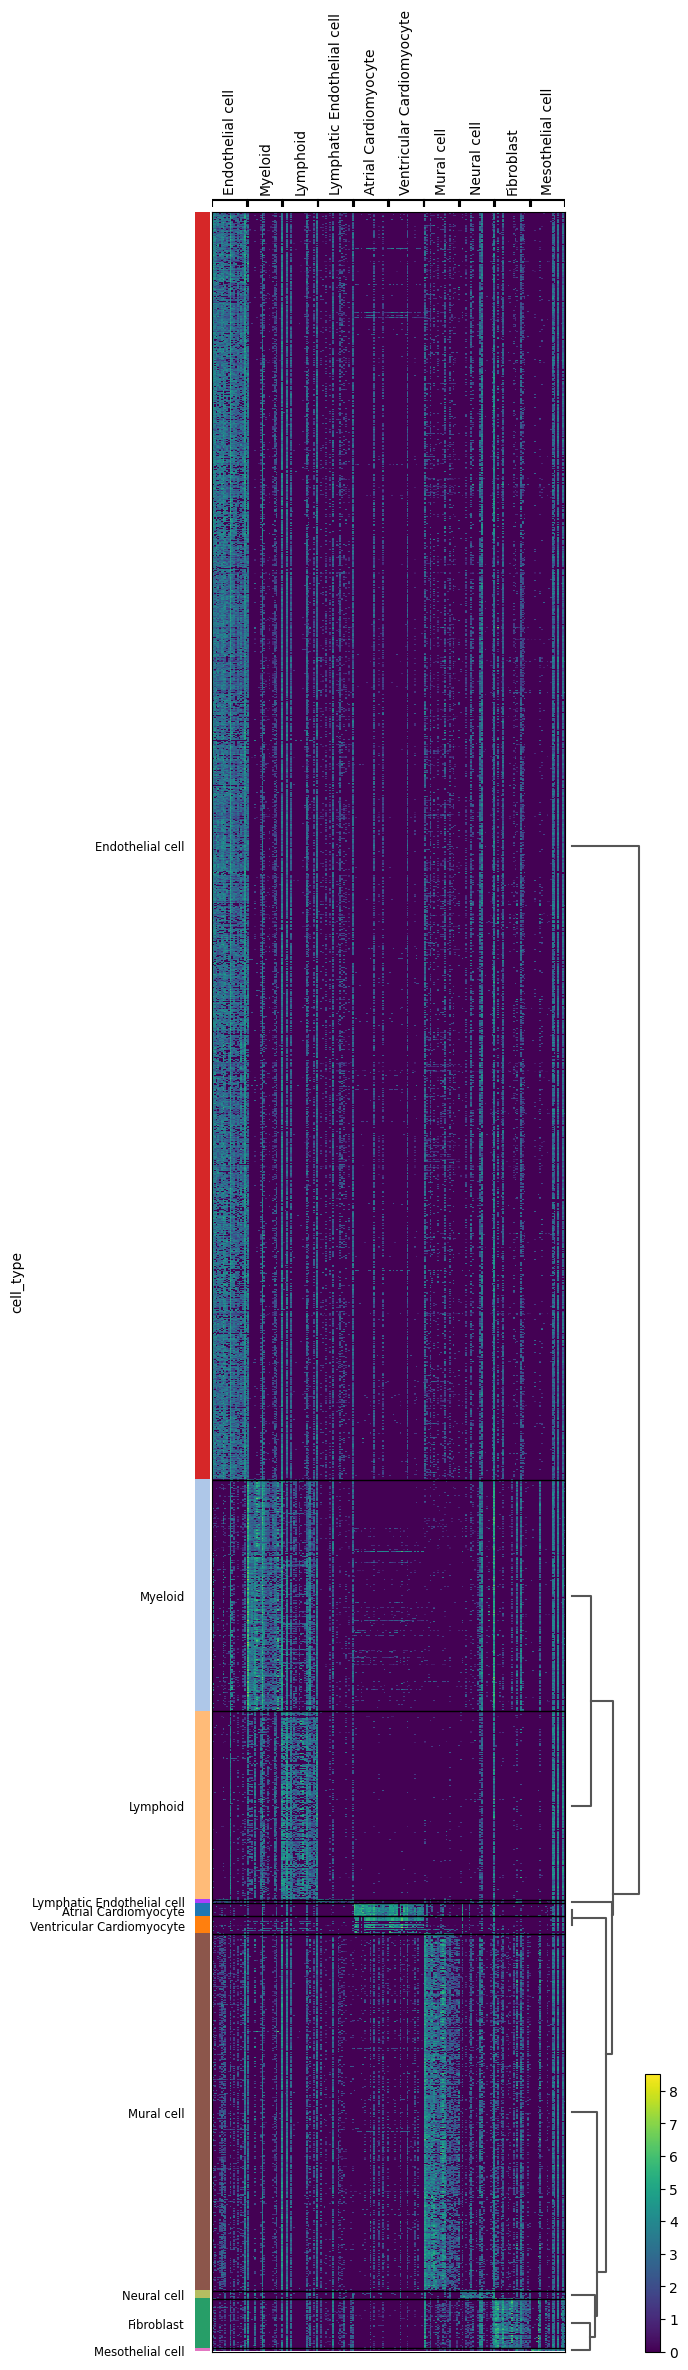

In [ ]:
# top 20 genes for all cell types in a heatmap

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc.pl.rank_genes_groups_heatmap(heart_cell_filtered, n_genes=20, groupby='cell_type',  figsize=(6, 30))

Finally we obtained gene sets that are differentially expressed in AC and VC, respectively.

In [ ]:
# Atrial Cardiomyocyte
atrial_markers = heart_cell_filtered.uns['rank_genes_groups']['names']['Atrial Cardiomyocyte'][:20]
print("Top 20 markers for Atrial Cardiomyocytes:", atrial_markers)

bottom_atrial_markers = heart_cell_filtered.uns['rank_genes_groups']['names']['Atrial Cardiomyocyte'][-20:]
print("Bottom 20 markers for Atrial Cardiomyocytes:", bottom_atrial_markers)

# Ventricular Cardiomyocytes
ventricular_markers = heart_cell_filtered.uns['rank_genes_groups']['names']['Ventricular Cardiomyocyte'][:20]
print("Top 20 markers for Ventricular Cardiomyocytes:", ventricular_markers)

bottom_ventricular_markers = heart_cell_filtered.uns['rank_genes_groups']['names']['Ventricular Cardiomyocyte'][-20:]
print("Bottom 20 markers for Ventricular Cardiomyocytes:", bottom_ventricular_markers)

Top 20 markers for Atrial Cardiomyocytes: ['MYL7' 'TNNT2' 'TCAP' 'MYL4' 'ACTC1' 'NPPA' 'DES' 'TNNI3' 'MB' 'CRYAB'
 'TNNC1' 'TPM1' 'CKM' 'COX6A2' 'SLC25A4' 'S100A1' 'COX7A1' 'FABP3' 'CSRP3'
 'PLN']
Bottom 20 markers for Atrial Cardiomyocytes: ['FABP5' 'VIM' 'SRGN' 'ACTG1' 'ITM2B' 'S100A11' 'SPARCL1' 'ACTB' 'HLA-E'
 'HLA-A' 'TMSB10' 'IFITM2' 'H3F3B' 'IFITM3' 'HLA-B' 'PTMA' 'HLA-C'
 'MALAT1' 'TMSB4X' 'B2M']
Top 20 markers for Ventricular Cardiomyocytes: ['TNNT2' 'TNNI3' 'MB' 'DES' 'TCAP' 'MYL3' 'CRYAB' 'MYL2' 'ACTC1' 'TNNC1'
 'TPM1' 'FABP3' 'COX6A2' 'HSPB7' 'SLC25A4' 'MYH7' 'PLN' 'CKM' 'S100A1'
 'CSRP3']
Bottom 20 markers for Ventricular Cardiomyocytes: ['CD59' 'ANXA2' 'S100A11' 'SPARCL1' 'MYL6' 'ITM2B' 'MALAT1' 'RPL3' 'H3F3B'
 'HLA-A' 'EEF1A1' 'HLA-E' 'IFITM2' 'IFITM3' 'TMSB10' 'HLA-B' 'HLA-C'
 'PTMA' 'TMSB4X' 'B2M']
